In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

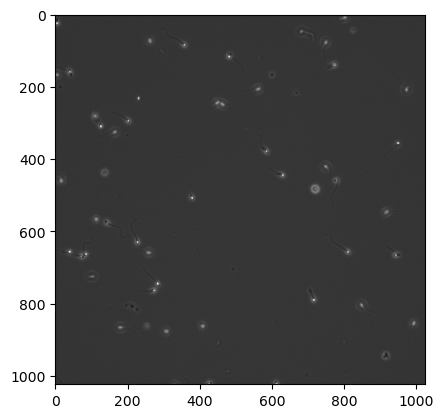

In [3]:
videofile = "ExampleVideos/20X Ph 149Fps Wash Dil 1 1 P017me R1.mp4"
#videofile = "ExampleVideos/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"
#videofile = "ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

53.0
19


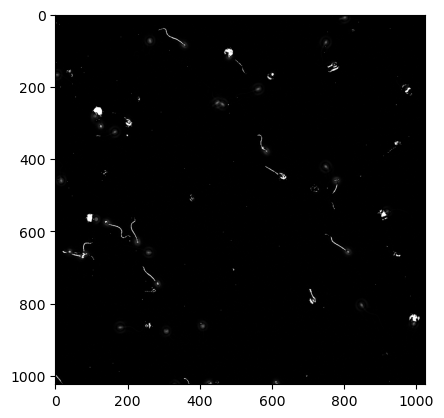

In [20]:
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
print(np.median(frames[0]))
print(np.amin(frames[0]))
#plt.imshow(255-frames[0],cmap='gray');plt.show()
#frames = utils.medianFilter(frames,perFrame=False)
frames = utils.positivePhaseFilter(frames)
plt.imshow(frames[0],cmap='gray');plt.show()

utils.saveVideo(frames,'median.mp4')


In [21]:
importlib.reload(tracker)

f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

Frame 249: 106 trajectories present.
            y           x         mass      size       ecc      signal  \
0    9.261174  801.383953  1379.949817  2.616793  0.247506   52.017494   
1  658.361597   24.664509  3444.301240  2.699435  0.480611  163.483554   
2  657.734860  810.920102  1460.205380  1.886338  0.128170  101.805668   
3  657.434582   40.112715  2419.556599  2.094365  0.111021  129.300629   
4  627.512405  206.493321   778.776203  1.487864  0.188870   96.603918   

   raw_mass        ep  frame  sperm  
0    4636.0  0.003648      0      0  
1    6716.0  0.002513      0      1  
2    4912.0  0.003442      0      2  
3    6285.0  0.002686      0      3  
4    1082.0  0.015995      0      9  


In [22]:
importlib.reload(tracker)

compute_segments = True
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [02:59<00:00,  1.39it/s]


            y           x         mass      size       ecc      signal  \
0    9.261174  801.383953  1379.949817  2.616793  0.247506   52.017494   
1  658.361597   24.664509  3444.301240  2.699435  0.480611  163.483554   
2  657.734860  810.920102  1460.205380  1.886338  0.128170  101.805668   
3  657.434582   40.112715  2419.556599  2.094365  0.111021  129.300629   
4  627.512405  206.493321   778.776203  1.487864  0.188870   96.603918   

   raw_mass        ep  frame  sperm  area  bbox_x  bbox_y  bbox_w  bbox_h  \
0    4636.0  0.003648      0      0    79     786       7      20       9   
1    6716.0  0.002513      0      1    28      21     656      12       6   
2    4912.0  0.003442      0      2    23     809     656       6       5   
3    6285.0  0.002686      0      3    25      38     655       6       5   
4    1082.0  0.015995      0      9     4     206     627       2       2   

                                        segmentation  
0  [[7, 800], [7, 801], [7, 802], [7,

In [23]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.calcAverageSpeed(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [24]:
importlib.reload(visualizer)

#visualizer.runVisualization(videofile, final, visualization="segments")
visualizer.runVisualization(videofile, final, visualization="segments", savefile="output_segments.mp4")

(2504, 3)
Video Finished.
